Importing Required Modules :

In [299]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [300]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sb
import json
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from kneed import KneeLocator
import math

Loading Dataset 

In [301]:
# Number of rows and columns
dfSongs = pd.read_csv('/content/SpotifySongs_Final.csv')
rows, cols = dfSongs.shape
print('Number of songs: {}'.format(rows))
print('Number of attributes per song: {}'.format(cols))

Number of songs: 3731
Number of attributes per song: 15


What are the Dataset Attributes : 


In [302]:
display(dfSongs.columns)

Index(['SongName', 'ArtistName', 'Popularity', 'Danceability', 'Energy', 'Key',
       'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms'],
      dtype='object')

Attribute Types :

In [303]:

dfSongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongName          3731 non-null   object 
 1   ArtistName        3731 non-null   object 
 2   Popularity        3731 non-null   int64  
 3   Danceability      3731 non-null   float64
 4   Energy            3731 non-null   float64
 5   Key               3731 non-null   int64  
 6   Loudness          3731 non-null   float64
 7   Mode              3731 non-null   int64  
 8   Speechiness       3731 non-null   float64
 9   Acousticness      3731 non-null   float64
 10  Instrumentalness  3731 non-null   float64
 11  Liveness          3731 non-null   float64
 12  Valence           3731 non-null   float64
 13  Tempo             3731 non-null   float64
 14  Duration_ms       3731 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 437.4+ KB


Removing Duplicate Values from the Dataset

In [304]:

dfSongs = dfSongs.drop_duplicates(subset=["SongName","ArtistName"])
#Since majority of the values of the attribute "Instrumentalness" are very small or Zero.
#We prefer to remove that column from the DataFrame
dfSongs=dfSongs.drop(['Instrumentalness'], axis=1)

In [305]:
rows, cols = dfSongs.shape
print('Number of songs: {}'.format(rows))

Number of songs: 1084


In [306]:
#we can see that there are no Duplicate Values.
dfSongs.duplicated().sum()

0

In [307]:
#Here we can see that there no NULL values in any of the attributes
dfSongs.isna().sum()

SongName        0
ArtistName      0
Popularity      0
Danceability    0
Energy          0
Key             0
Loudness        0
Mode            0
Speechiness     0
Acousticness    0
Liveness        0
Valence         0
Tempo           0
Duration_ms     0
dtype: int64

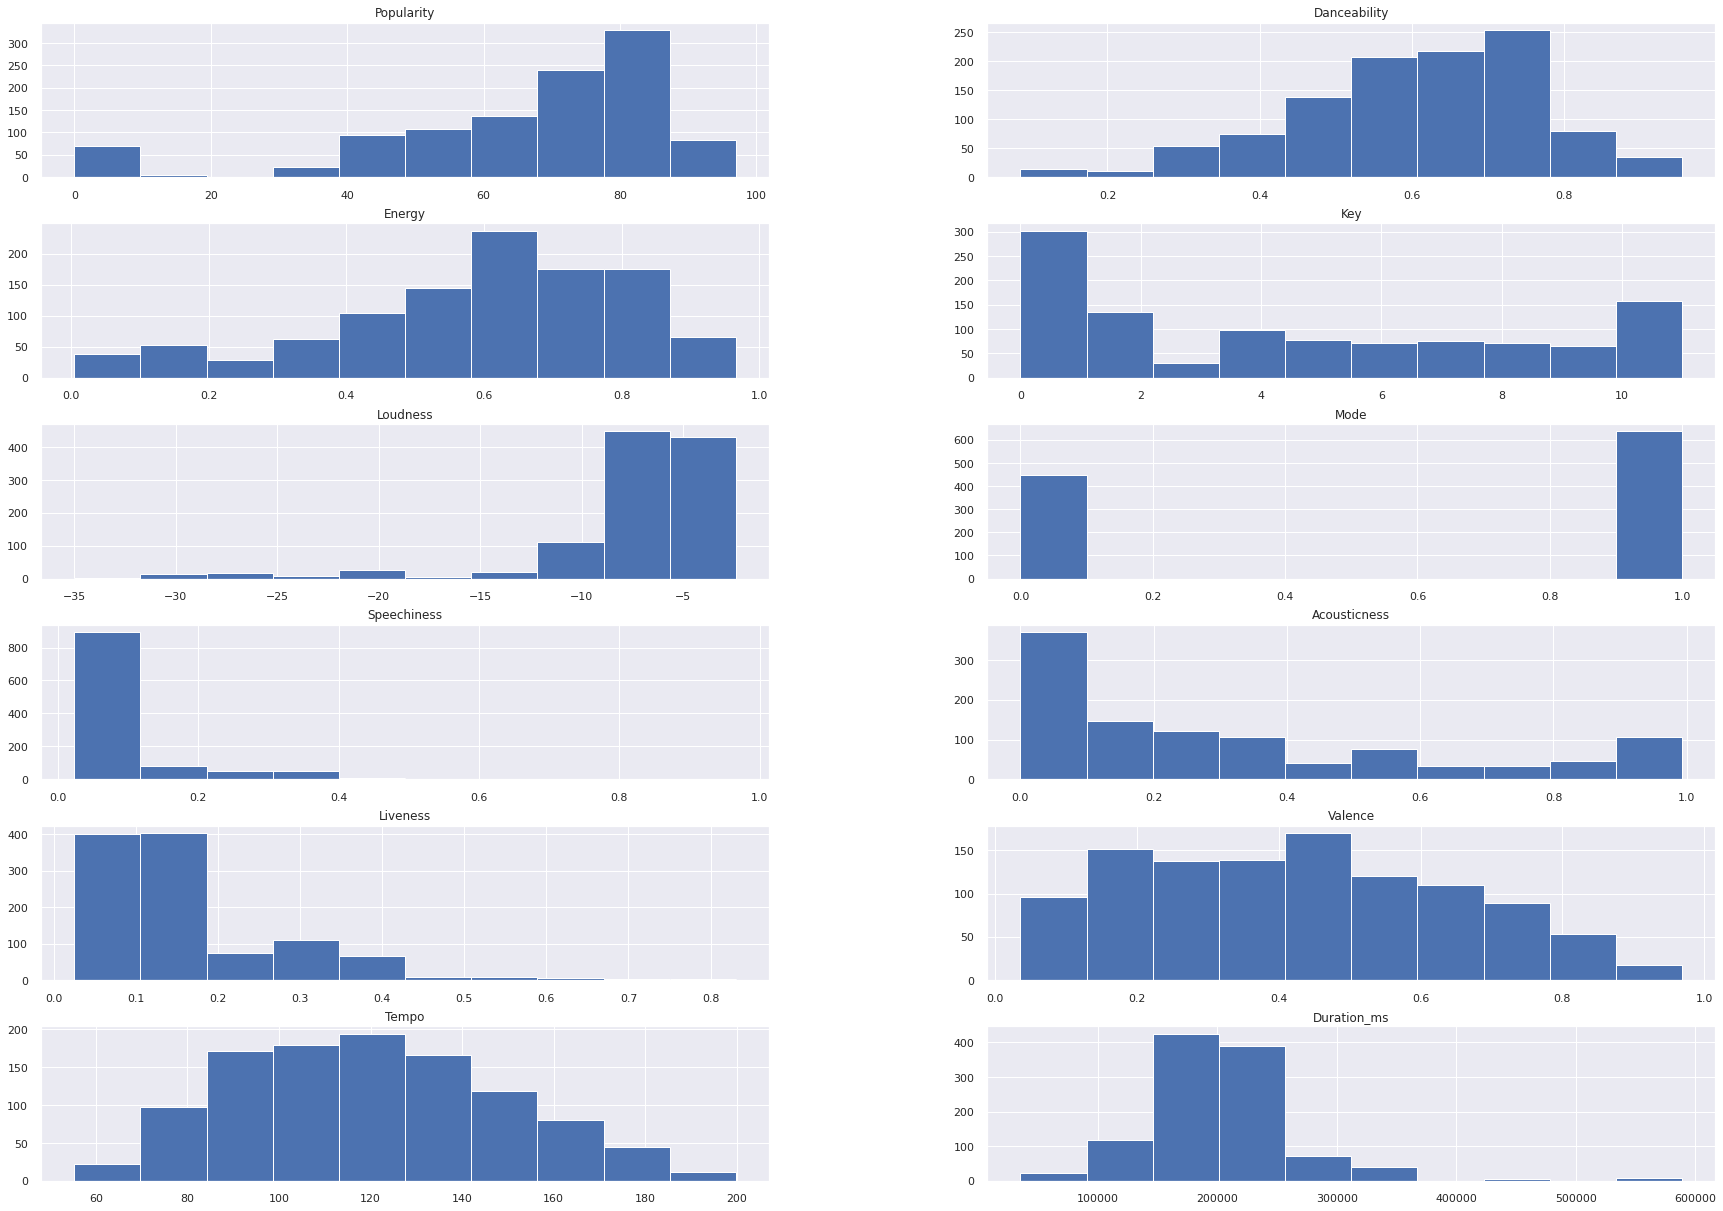

In [308]:
#Drawing the Histogram of each attribute to know more details about each attributes
dfSongs.hist(layout=(7,2),figsize=(30,25));

To find Skewness of the Data:

In [309]:
SongSkewness = dfSongs.skew(axis=0)
SongSkewness = np.round(SongSkewness,decimals=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [310]:
def FindSkewness(value):
    if value > 0: 
        return 'Positive Skewness'
    elif value < 0:
        return'Negative Skewness'
    return 'No Skewness'

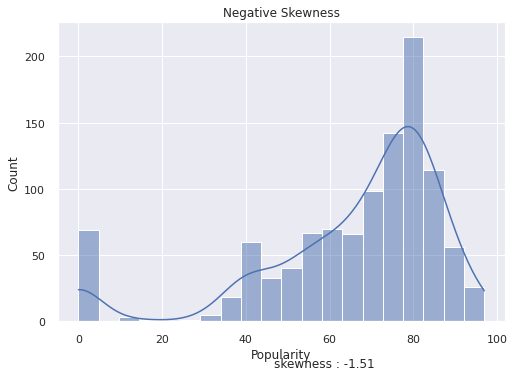

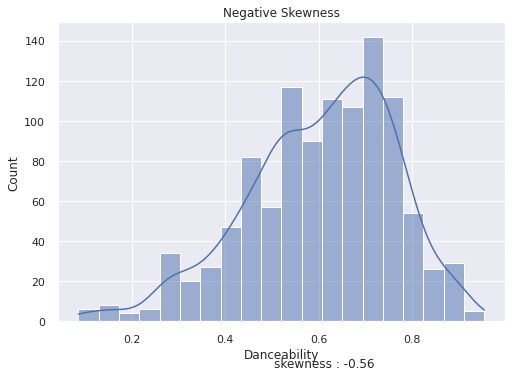

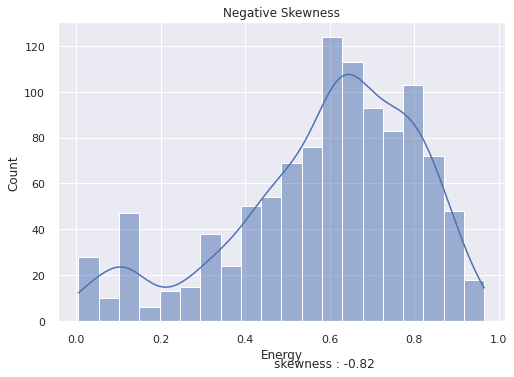

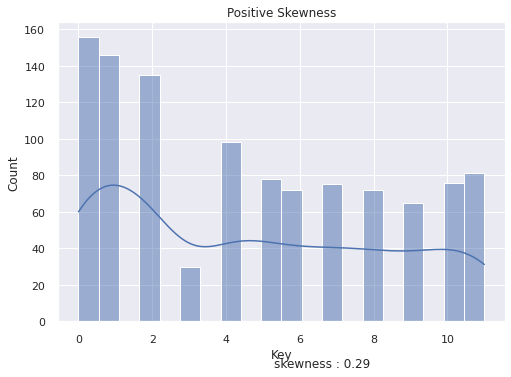

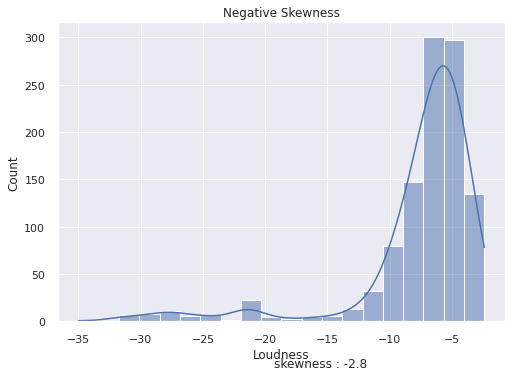

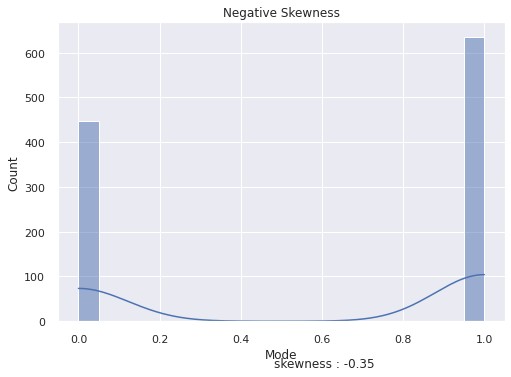

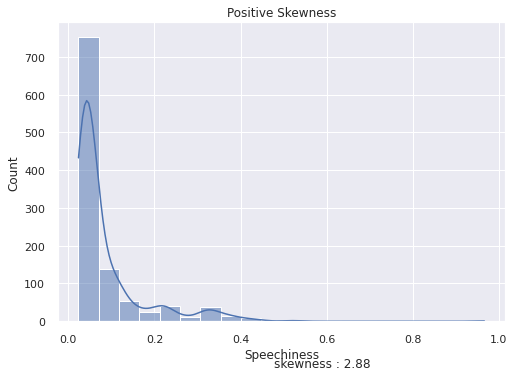

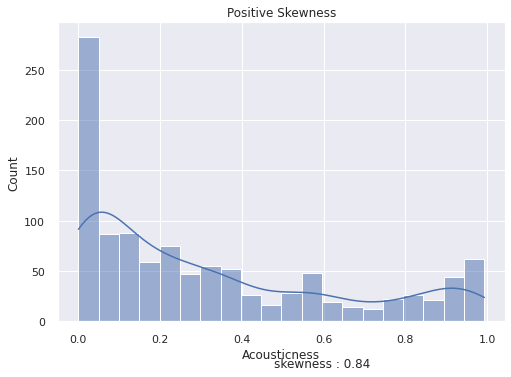

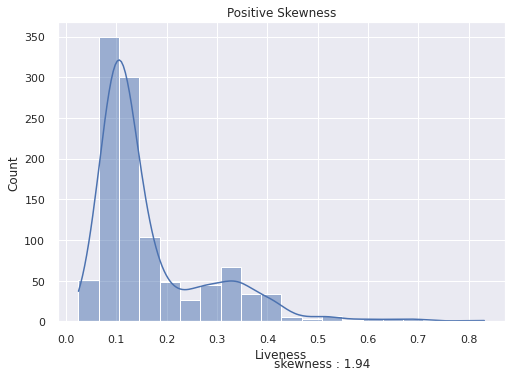

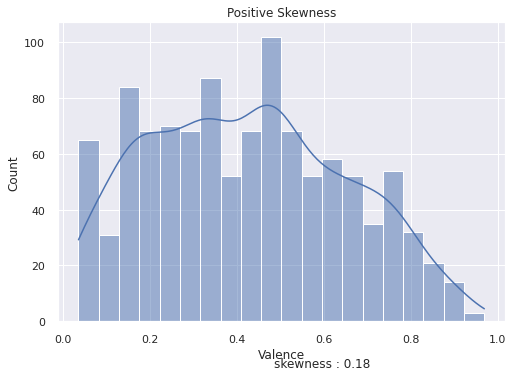

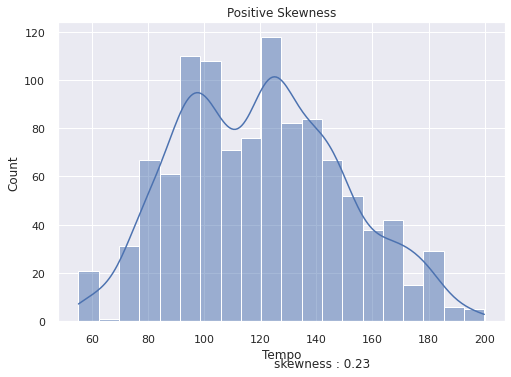

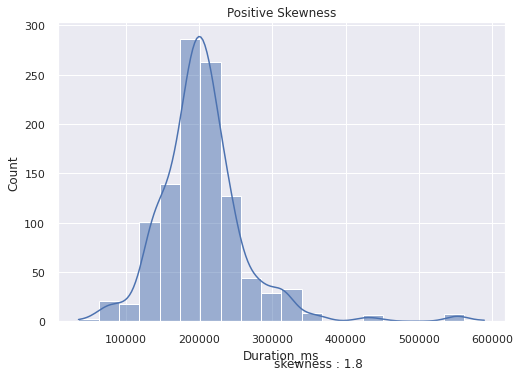

In [311]:
numeric_cols  = dfSongs._get_numeric_data().columns.tolist()

for i, column in enumerate(numeric_cols):
    sb.histplot(dfSongs[column],bins = 20,kde = True);
    conclusion = FindSkewness(SongSkewness[i])
    plt.title(conclusion)
    plt.figtext(0.5,0.01,f"skewness : {SongSkewness[i]}")
    plt.show()

Finding Outliers in the Dataset:

In [312]:
Q1 = dfSongs.quantile(0.25)
Q3 = dfSongs.quantile(0.75)
IQR = Q3 - Q1
((dfSongs < (Q1 - 1.5 * IQR)) | (dfSongs > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Acousticness      0
ArtistName        0
Danceability     16
Duration_ms      80
Energy           20
Key               0
Liveness        126
Loudness         83
Mode              0
Popularity       73
SongName          0
Speechiness     134
Tempo             0
Valence           0
dtype: int64

In [313]:
columns=["Popularity","Danceability","Energy","Loudness","Speechiness","Liveness","Duration_ms"]
for col in columns:
  df=dfSongs[col]
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  upper =(Q3 + 1.5 * IQR)
  lower =(Q1 - 1.5 * IQR)
  mean = round(df.mean(),2)
  dfSongs[col]=np.where(df<lower,mean,df)
  dfSongs[col]=np.where(df>upper,mean,df)


All the Outliers have been Removed

To find the Co-relation Between Different Attributes : 

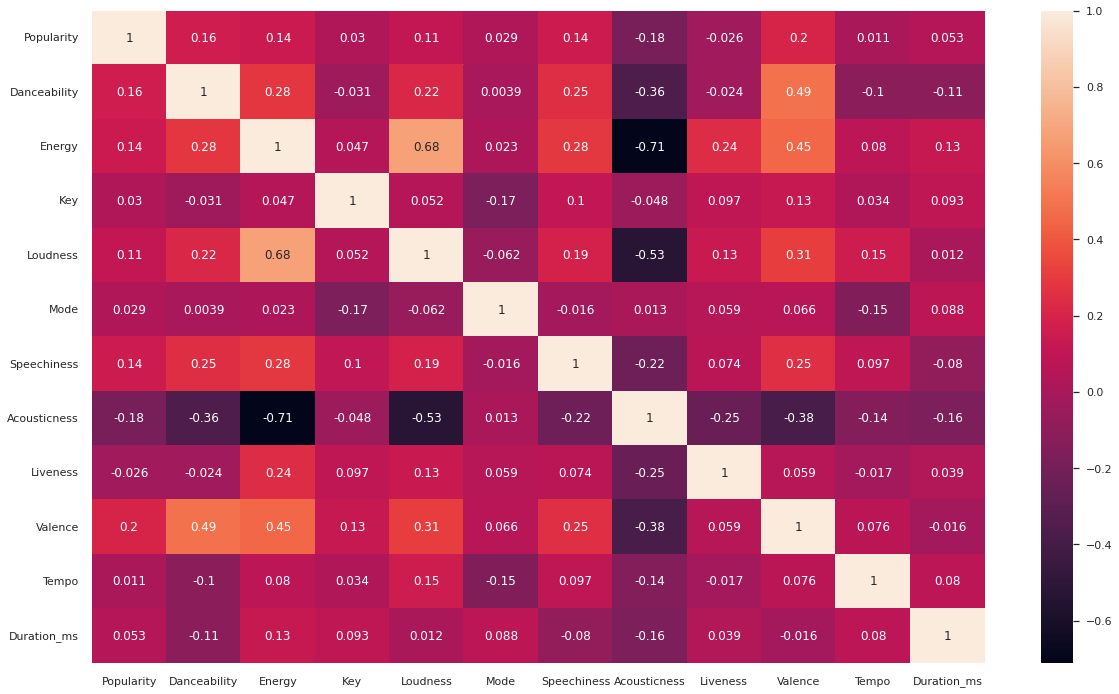

In [314]:
corrilation_data = dfSongs.corr()
corrilation_data
plt.figure (figsize=(20, 12))
sb.heatmap(corrilation_data,annot=True);

From the Correlogram, We can see that :<br>
Energy and Acousticness have a strong Negative Correlation</br>
Acousticness and Loudness have a strong Negative Correlation</br>
Loudness and Energy have a strong Positive Correlation.


In [315]:
print("no of unique Songs")
print(len(dfSongs["SongName"].unique()))
print("no of unique artist")
print(len(dfSongs["ArtistName"].unique()))


no of unique Songs
1063
no of unique artist
561


To find the most popular Artist : 

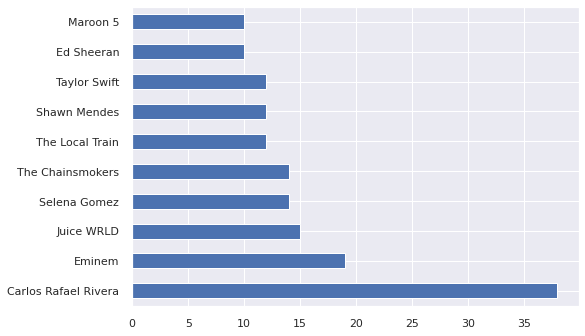

In [316]:
dfSongs["ArtistName"].value_counts()[:10].plot(kind='barh')


From the Graph we can see that, **Carlos Rafael Rivera** is the most Popular Aritst

Most popular Song:

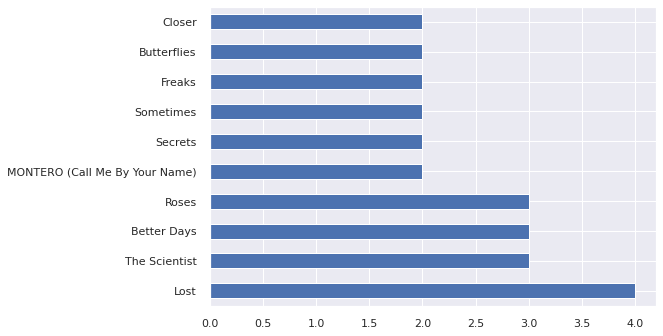

In [317]:

dfSongs["SongName"].value_counts()[:10].plot(kind='barh')

We come to know that **Lost** is the most Popular Song

PCA

In [318]:
non_features = ['SongName', 'ArtistName']
track_info = dfSongs[non_features]
df_X = dfSongs.drop(columns=non_features)
df_X.head()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms
0,62.0,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.1100,0.604,130.024,205450.0
1,84.0,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.0887,0.236,127.085,159382.0
2,72.0,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.1520,0.319,135.864,247941.0
3,68.0,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.3290,0.311,156.396,287374.0
4,67.0,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.0704,0.837,116.977,170769.0


In [319]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

In [320]:
pca = PCA()
pca.fit(X_std);

In [351]:
pca.fit(X_std)

PCA(n_components=8)

In [360]:
# The attribute shows how much variance is explained by each of the 12 features
evr = pca.explained_variance_ratio_
comp = pca.
comp

8

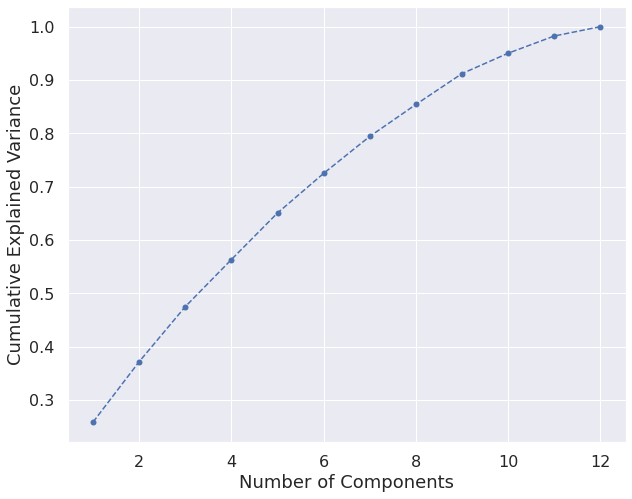

In [322]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(df_X.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Choosing the Number of Components:

In [350]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.85:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)


Number of components: 8


So, we can conclude that 8 out of the 12 features are enough to expalin 85% of the variance.

K-Means Clustering : 

Using Elbow Method to find the Optimal Number of Clusters for the given Dataset.

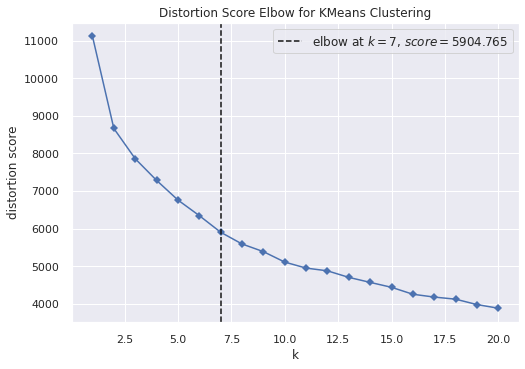

Optimal number of clusters: 7


In [324]:
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

Finding the Optimal point Using Kneed

In [325]:
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 7


In [326]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

Grouping Each row into 1 Cluster

In [327]:
df_seg_pca_kmeans = pd.concat([df_X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


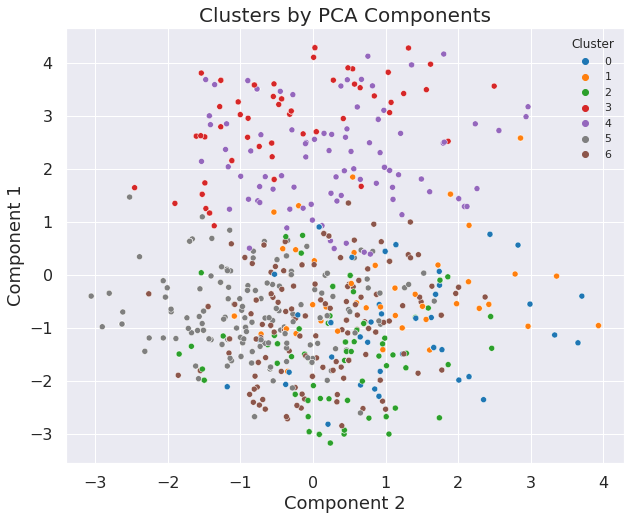

In [328]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sb.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple','tab:grey' , 'tab:brown', ])# 'tab:grey' , 'tab:brown',
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Graphical representation of Distribution in different Clusters

In [329]:

df_cluster=df_seg_pca_kmeans.drop(df_seg_pca_kmeans.loc[:, 'Component 1':'Component 8'].columns, axis=1)


In [330]:
df_cluster=df_seg_pca_kmeans.drop(df_seg_pca_kmeans.loc[:, 'Component 1':'Component 8'].columns, axis=1)
_vars=df_cluster.columns.tolist()
sb.set()
PairGrid = sb.PairGrid(df_cluster[(df_cluster['Cluster'] == 0) | (df_cluster['Cluster'] == 1) |(df_cluster['Cluster'] == 2) | (df_cluster['Cluster'] == 3) | (df_cluster['Cluster'] == 4)], vars = _vars[2:-1], hue = 'Cluster',
                        diag_sharey = False, corner = True)
PairGrid.map_lower(sb.scatterplot, s = 50, edgecolor = 'white', alpha = 0.5)
PairGrid.map_diag(sb.histplot)

PairGrid.add_legend()
PairGrid.fig.suptitle('An overview of the comparison of clusters', fontsize = 56, ha = 'center', va = 'baseline')

plt.show()

CHI - SQUEARED TEST

In [331]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency

def chi_square_test(feature1,feature2):
    sample_table=pd.crosstab(dfSongs[feature1],dfSongs[feature2])
    
    col_sum = sample_table.sum(axis=0)
    col_percentage = (sample_table)/col_sum
    alpha=0.05
    
    stat, p, dof, expected = chi2_contingency(sample_table)
    if p<=alpha:
        mssg="Dependent (Reject Null Hypothesis)"
    else:
        mssg="Independent (Null Hypothesis holds true)"

        
    print('Chi-square value is: {:.2f} \tp-value: {} \tdf: {} \tOutcome: {}'.format(stat, p,dof,mssg))

Null Hypothesis : There is no relation between Energy of Song and popularity of the song.

In [332]:
chi_square_test('SongName','Mode')

Chi-square value is: 1069.22 	p-value: 0.4321858599687855 	df: 1062 	Outcome: Independent (Null Hypothesis holds true)


Null Hypothesis holds True

Anova Test

In [343]:
from scipy.stats import f_oneway
def anova(sample1,sample2,sample3):
    F,p=f_oneway(sample1,sample2,sample3)  
    if p<=0.05:
        result='Reject'
    else:
        result='Accept'
    print('F Statistic: {:.2f} \tp-value: {:.5f} \tNull Hypothesis: {}'.format(F, p,result))

Null Hypothesis : There is no variation between Danceability Energy and Mode

In [344]:
np.random.seed(40)
danceability = np.random.choice(a= dfSongs['Danceability'], size=100)
energy = np.random.choice(a= dfSongs['Energy'], size=100)
mode=np.random.choice(a= dfSongs['Mode'], size=100)

In [346]:
anova(danceability,energy,mode)

F Statistic: 0.27 	p-value: 0.76393 	Null Hypothesis: Accept


Normalizing the Data:

In [215]:
df_norm = dfSongs.copy()
norm_columns = ["Popularity","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Liveness","Valence","Tempo","Duration_ms"]
for column in norm_columns:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())    

df_norm.head()

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,0.639175,0.922876,0.692110,0.000000,0.986561,0.0,0.390572,0.013613,0.279633,0.608957,0.517082,0.628886
1,Falling,Trevor Daniel,0.865979,0.777778,0.428052,0.909091,0.377379,0.0,0.086869,0.123704,0.209889,0.214699,0.496752,0.458676
2,Shayad,Pritam,0.742268,0.383007,0.467607,0.727273,0.486659,1.0,0.071380,0.790495,0.417158,0.303621,0.557477,0.785881
3,Malang (Title Track) [From Malang - Unleash Th...,Ved Sharma,0.701031,0.253595,0.745563,0.636364,0.598391,0.0,0.261279,0.331195,0.996726,0.295050,0.699497,0.931577
4,Genda Phool (feat. Payal Dev),Badshah,0.690722,1.000000,0.542442,0.090909,0.412890,1.0,0.336027,0.132769,0.149967,0.858582,0.426835,0.500748


KNN

In [216]:
KNN_dataset = df_norm.copy()
KNN_dataset = KNN_dataset.drop(['SongName','ArtistName'],axis=1)


spotify_clusters = 7
kmeans = KMeans(n_clusters = spotify_clusters, max_iter = 300)

kmeans.fit(KNN_dataset)
labels_vanilla = kmeans.labels_
labels_vanilla

KNN_norm = df_norm.copy()
KNN_norm.loc[:,'Cluster'] = kmeans.labels_

In [217]:
KNN_norm.head()

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Cluster
0,Saiyaan Ji,Yo Yo Honey Singh,0.639175,0.922876,0.692110,0.000000,0.986561,0.0,0.390572,0.013613,0.279633,0.608957,0.517082,0.628886,1
1,Falling,Trevor Daniel,0.865979,0.777778,0.428052,0.909091,0.377379,0.0,0.086869,0.123704,0.209889,0.214699,0.496752,0.458676,2
2,Shayad,Pritam,0.742268,0.383007,0.467607,0.727273,0.486659,1.0,0.071380,0.790495,0.417158,0.303621,0.557477,0.785881,4
3,Malang (Title Track) [From Malang - Unleash Th...,Ved Sharma,0.701031,0.253595,0.745563,0.636364,0.598391,0.0,0.261279,0.331195,0.996726,0.295050,0.699497,0.931577,2
4,Genda Phool (feat. Payal Dev),Badshah,0.690722,1.000000,0.542442,0.090909,0.412890,1.0,0.336027,0.132769,0.149967,0.858582,0.426835,0.500748,3


In [218]:
Song_Title = "Lost"

In [219]:

index_Value=KNN_norm[KNN_norm['SongName'] == Song_Title].index[0]

df2 = KNN_norm.loc[index_Value,["Cluster"]]
df2.head()
df2=df2[0]

Req_SongNames = KNN_norm.loc[KNN_norm['Cluster'] == df2]

#dfSongs['SongName'] = dfSongs['SongName'].apply(lambda x: x.replace('"', ''))
def knnQuery(queryPoint, arrCharactPoints, k):
    tmp = arrCharactPoints.copy(deep=True)
    tmp['dist'] = tmp.apply(lambda x: np.linalg.norm(x-queryPoint), axis=1)
    tmp = tmp.sort_values('dist')
    return tmp.head(k).index

def querySimilars(df, columns, idx, func, param):
    arr = df[columns].copy(deep=True)
    queryPoint = arr.loc[idx]
    arr = arr.drop([idx])
    response = func(queryPoint, arr, param)
    return response

#index_Value = int(dfSongs[dfSongs["SongName"]==Song_Title].index.values)
#index_Value=dfSongs[dfSongs['SongName'] == Song_Title].index[0]
index_Value=KNN_norm[KNN_norm['SongName'] == Song_Title].index[0]

df2 = KNN_norm.loc[index_Value,["Cluster"]]
df2.head()
df2=df2[0]


Req_SongNames = KNN_norm.loc[KNN_norm['Cluster'] == df2]
Songs_Cluster = Req_SongNames.shape[0]

# Selecting song and attributes
columns = ['Acousticness','Energy','Key','Valence','Tempo','Mode',
           'Danceability','Duration_ms','Popularity','Speechiness','Liveness','Loudness']
# Selecting query parameters
func, param = knnQuery, 25 # k=5
# Querying
#response = querySimilars(dfSongs, columns, index_Value, func, param)
response = querySimilars(df_norm, columns, index_Value, func, param)

Song_Names = Req_SongNames['SongName']

if param > Songs_Cluster:
  for i in Song_Names:
    print(i)
else:
  for idx in response:
    #anySong = dfSongs.loc[idx]
    anySong = df_norm.loc[idx]
    anySongName = anySong["SongName"]
    
    print(anySongName)

Stitches
Flightless Bird, American Mouth
Look Back at It
Dior
Surrender
Is It Just Me? (feat. Charlie Puth)
Dont Start Now
The Rains of Castamere (From the HBO® Series Game Of Thrones - Season 4)
Cocaine
Youre Gloating
Were Good
Dandelion
Lean On
S&M Remix
Just for me
Ga$ Money
Peaches (feat. Daniel Caesar & Giveon)
We Own It (Fast & Furious)
Happier
Bare
Purple Lamborghini (with Rick Ross)
Each Coming Night
Hurts Sometimes (with Jonathan Mendelsohn)
Space Bound
Beneath the Surface


#DBSCAN

In [251]:
# extracting the above mentioned columns
x=df_norm.copy()
x=x.drop(["SongName","ArtistName"],axis=1)
#x = dfSongs.loc[:, ['Annual Income (k$)',
                 #'Spending Score (1-100)']].values

In [252]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 3717
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Popularity    1084 non-null   float64
 1   Danceability  1084 non-null   float64
 2   Energy        1084 non-null   float64
 3   Key           1084 non-null   float64
 4   Loudness      1084 non-null   float64
 5   Mode          1084 non-null   float64
 6   Speechiness   1084 non-null   float64
 7   Acousticness  1084 non-null   float64
 8   Liveness      1084 non-null   float64
 9   Valence       1084 non-null   float64
 10  Tempo         1084 non-null   float64
 11  Duration_ms   1084 non-null   float64
dtypes: float64(12)
memory usage: 142.4 KB


In [253]:
print(x.shape)

(1084, 12)


MinPoints = 2 * Data dimension
So, MinPoints = 24.

In [254]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=24) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) 

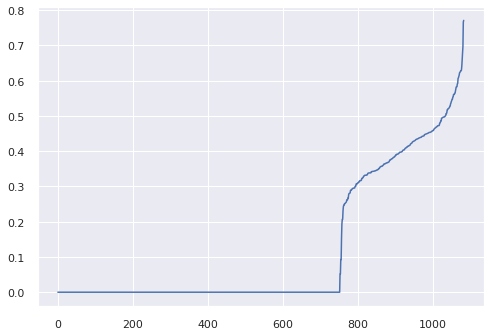

In [255]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [256]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.57, min_samples = 24).fit(x) # fitting the model
DBSCAN_dataset = dfSongs.copy()
DBSCAN_dataset.loc[:,'Cluster'] = dbscan.labels_
labels = dbscan.labels_ # getting the labels

In [257]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,518
1,291
-1,249
2,26


In [258]:
DBSCAN_dataset.head()


,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Cluster
0,Saiyaan Ji,Yo Yo Honey Singh,62.0,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.1100,0.604,130.024,205450.0,1
1,Falling,Trevor Daniel,84.0,0.785,0.431,10,-8.756,0,0.0364,0.1230,0.0887,0.236,127.085,159382.0,1
2,Shayad,Pritam,72.0,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.1520,0.319,135.864,247941.0,0
3,Malang (Title Track) [From Malang - Unleash Th...,Ved Sharma,68.0,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.3290,0.311,156.396,287374.0,-1
4,Genda Phool (feat. Payal Dev),Badshah,67.0,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.0704,0.837,116.977,170769.0,0


In [259]:
Song_input = "Falling"
song_index = DBSCAN_dataset[DBSCAN_dataset['SongName'] == Song_input].index[0]

song_index

df2 = DBSCAN_dataset.loc[song_index,["Cluster"]]
df2.head()
df2=df2[0]#It contains the value of the cluster to which the given song belongs!!
#print(df2)

In [260]:
Req_SongNames = DBSCAN_dataset.loc[DBSCAN_dataset['Cluster'] == df2]["SongName"]
for i in Req_SongNames:
  if(i != Song_input):
    print(i)

Saiyaan Ji
Humraah (From Malang - Unleash The Madness)
Higher (feat. iann dior)
HUMBLE.
Sucker for Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)
King Kunta
Comptine dun autre été, laprès-midi
You Raise Me Up
Big Gangsta
good 4 u
Arcade
Heartbreak Anthem (with David Guetta & Little Mix)
Training With Mr. Schaibel
SugarCrash!
Mera Mann Kehne Laga
Come & Go (with Marshmello)
Blastoff (feat. Juice Wrld & Trippie Redd)
Bandit (with YoungBoy Never Broke Again)
Honesty
Mask Off - Marshmello Remix
All Night
Perfect Strangers
Hide (feat. Seezyn)
Crooked Smile (feat. TLC)
Take Me To Church
Takeaway
One More Day (with Chandler Leighton)
Believer
Goodbye To A World
Magic in the Air (feat. Ahmed Chawki)
The Business
Wants and Needs (feat. Lil Baby)
Can We Kiss Forever?
Something Just Like This
Dont Let Me Down
Who Do You Love
The Reaper
Share
Fingers Crossed
Cloudy Day
Imagine - Tiësto Remix
Going Dumb
Silence
Alone, Pt. II
Symphony (feat. Zara Larsson)
The Bes

Model 3 : Collaborative Filtering Using Cosine Similarity

In [261]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [262]:
df_norm.reset_index(drop=True, inplace=True)
dfSongs.reset_index(drop=True, inplace=True)
df3 = df_norm.copy()
df3 = df3.drop(["SongName","ArtistName"],axis=1)
df3.reset_index(drop=True)
df3.tail()

,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms
1079,0.546392,0.905882,0.745563,0.000000,0.639984,1.0,0.182492,0.229464,0.485920,0.485751,0.337329,0.512786
1080,0.556701,0.600000,0.777635,0.909091,0.682362,0.0,0.232997,0.036477,0.476097,0.751446,0.447752,0.489819
1081,0.814433,0.752941,0.722044,0.636364,0.593486,0.0,0.919192,0.224428,0.129011,0.782516,0.606761,0.507506
1082,0.515464,0.470588,0.217447,0.000000,0.229449,1.0,0.082828,0.947624,0.245580,0.211485,0.121255,0.624467
1083,0.824742,0.803922,0.320077,0.090909,0.381695,0.0,0.515152,0.221406,0.263261,0.187915,0.461372,0.767562


In [263]:
df3['mean']  = df3.mean(axis =1)

In [264]:
# Finding Out If Song Is Present In DataSet 
def getSongIndex(songName):
    
    bool = dfSongs['SongName'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

In [265]:
songName = 'Idk'

In [266]:
linear_kernal = linear_kernel(df3)
euclidian = euclidean_distances(df3)
consine = cosine_similarity(df3)

In [267]:
def recommendation(m_name,model =consine):
    # default model is linear kernal 
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score,key = lambda x:x[1],reverse = True)
    sim_score = sim_score[1:51]
    Index = [i[0] for i in sim_score]
    return dfSongs["SongName"].iloc[Index]

In [268]:
#model for cosine_similarity
req_Songs = recommendation(songName)
count = 0
for i in req_Songs:
  print(i)

Idk
4 Da Gang (with Roddy Ricch)
Human
Experience
In The Name Of Love - The Him Remix
Human Spirit
Break Me Down
Hate You + Love You (feat. AJ Mitchell)
Roadtrip
Jeena Jeena (From Badlapur)
Pehli Nazar Mein
Dusty Blue
The One I Love
The Gentle Rain - RJD2 Remix
Bol Do Na Zara (From Azhar)
Same For You
Take Me Higher
Someone To Stay
The Meetings of the Waters
Sunflower - Spider-Man: Into the Spider-Verse
Last Train Home
Change My Clothes
Telling Myself
Feel This Moment (feat. Christina Aguilera)
River Flows In You
Lonely Together (feat. Rita Ora)
I Like Me Better
Iris
good 4 u
Goodbye To A World
Wants and Needs (feat. Lil Baby)
Moscow Invitational 1968
Close Your Eyes
Borgov III
The Final Game
Take It, Its Yours
Dilnawaz
Kaisey Jiyun
Power is Power (feat. The Weeknd & Travis Scott)
Say You Wont Let Go
Lose Yourself - From 8 Mile Soundtrack
I Found
(They Long To Be) Close To You
Till I Collapse
Rewrite The Stars (with James Arthur & Anne-Marie)
Ode To My Family
All My Friends
New Love (f

Model 4 : Euclidian Distance

In [269]:
df3 = df_norm.copy()
df3 = df3.drop(["SongName","ArtistName"],axis=1)
df3.reset_index(drop=True)

df3['mean']  = df3.mean(axis =1)

songName = Song_Title


def getSongIndex(songName):
    
    bool = df_norm['SongName'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

SongIndex = getSongIndex(songName)
centermean = df3.loc[SongIndex,"mean"]
distance = []
#getting Distance OF Song From Our Main Song
for i,val in enumerate (df3['mean']):
   distance.append(math.sqrt( ( (val - centermean) **2 ) ) )
   
topn =[]
donot = False
#finging top least distance Song  
for i in range(0,200):
   val = min(distance) 
   index = distance.index(val)
   distance.remove(val)
   if donot:
       topn.append(index)
   donot = True
   
Req_Songs = dfSongs.iloc[topn]["SongName"]
count =0
for i in Req_Songs:
  print(i)

One Moment in Time - Remastered
Real Shit (with benny blanco)
Violin Concerto in D Major, Op. posth., No. 2: Adagio
Stranger
Wont Bite (feat. Smino)
Fetish (feat. Gucci Mane)
BedRock
Hanuman Chalisa
Peaches (feat. Daniel Caesar & Giveon)
Ex Bitch
Walk It Talk It
Swang
Roses
Just Dance
The Rains Of Castomere
NIGHTRIDER
I Found
Silence
ANGELS & DEMONS
Heartbreak Anthem (with David Guetta & Little Mix)
I Love You.
Ode To My Family
Excitement (feat. PARTYNEXTDOOR)
Sucker for Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors)
Round & Round
Hollywoods Bleeding
idfc
Arcade
Tchaikovsky: Swan Lake, Op. 20, Act 2: Scene (Moderato)
Beautiful People (feat. Khalid)
Just Dance
Changes
The Monster
DRXGS - Rawtek Remix
Back To The Sky
Lily
working
Idk
Dilnawaz
Shots - Broiler Remix
Just Dance
traitor
Hurricane
Little Do You Know
Shree Hanuman Chalisa
Back To Black
Frozen
Whistle
overwhelmed
Aadmi Chutiya Hai
Fetish (feat. Gucci Mane)
Better Now
Liability
dont say you l